# Exercícios para entrega (Prova)

## Questão 2

$p(x|\omega_{1}) \backsim \mathcal{N}(8, 1)$

$p(x|\omega_{2}) \backsim \mathcal{N}(10, 1)$

$P(\omega_{1}) = P(\omega_{2}) = \frac{1}{2}$

In [1]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
# Delimitação de dimensões para as figuras
X_MIN = 2
X_MAX = 16
N_PONTOS = 1000

$p(x | \omega_{i})$

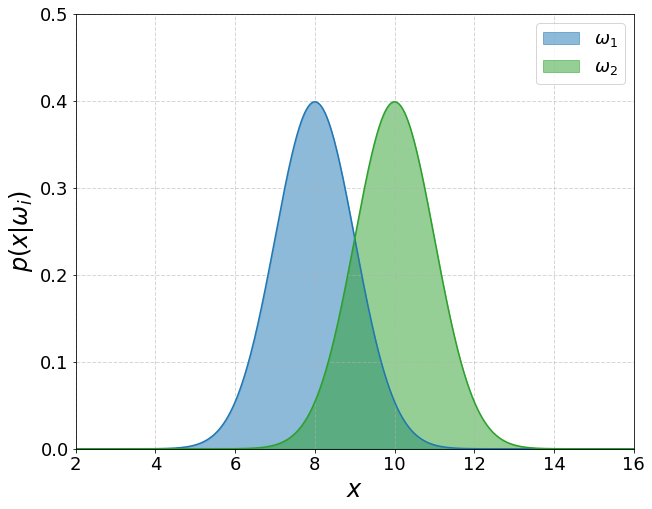

In [3]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 8
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_02_a1.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

$p(x | \omega_{i})\cdot P(\omega_{i})$

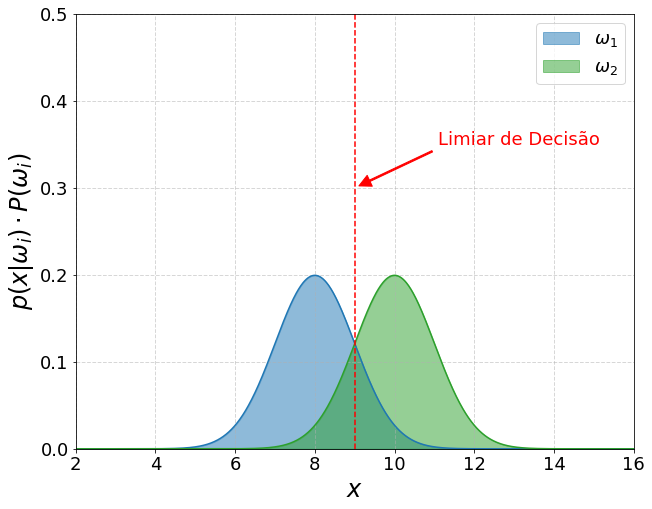

In [4]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 8
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.5 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.5 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Plot do limiar de decisão
plt.axvline(x=9, linestyle='--', color='red')
plt.annotate('Limiar de Decisão', 
             xy=(9.0, 0.3), 
             xytext=(11.1, 0.35), 
             arrowprops=dict(facecolor='red', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='red'), 
             color='red', 
             fontsize=18)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)\cdot P(\omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_02_a2.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

### Simulando a classificação de N=1000 novas amostras

In [129]:
# Geração de um conjunto de 500 amostras da classe omega_1 e 500 amostras da classe omega_2
amostras_omega1 = np.random.normal(8, 1, int(N_PONTOS/2))
amostras_omega2 = np.random.normal(10, 1, int(N_PONTOS/2))

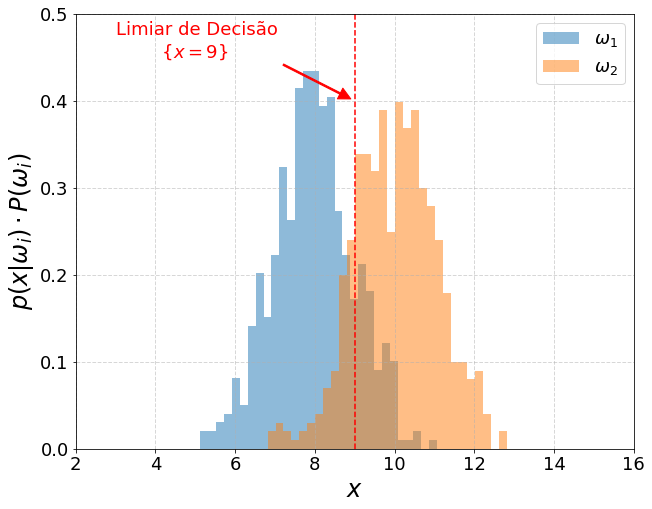

In [130]:
# Plot dos dados
plt.figure(figsize=(10, 8))

_, _, _ = plt.hist(amostras_omega1, 30, density=True, alpha=0.5, label=r'$\omega_1$')
_, _, _ = plt.hist(amostras_omega2, 30, density=True, alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Plot do limiar de decisão
plt.axvline(x=9, linestyle='--', color='red')
plt.annotate('Limiar de Decisão\n\t$\{x=9\}$', 
             xy=(9.0, 0.4), 
             xytext=(3, 0.45), 
             arrowprops=dict(facecolor='red', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='red'), 
             color='red', 
             fontsize=18)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)\cdot P(\omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_02_simulacao_1000_amostras.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

In [131]:
# Função que classifica uma amostra segundo um dado limiar
def classificar(amostra, limiar):
    if amostra < limiar:
        return 0
    else:
        return 1

In [132]:
# Função que classifica um conjunto de amostras de acordo com um dado limiar
def classificar_conjunto(amostras, limiar):
    return np.array([classificar(amostra, limiar) for amostra in amostras])

In [133]:
# Função que calcula a quantidade de erros de classificação e a taxa de erro de classificação
def erros(classes_preditas, classe_correta):
    n_erros = 0
    for amostra in classes_preditas:
        if amostra != classe_correta:
            n_erros += 1
    taxa_de_erros = n_erros/len(classes_preditas)
    return n_erros, taxa_de_erros

In [134]:
# Classificação de uma amostra de acordo com um dado limiar
pred_omega1 = classificar_conjunto(amostras_omega1, limiar=9)
pred_omega2 = classificar_conjunto(amostras_omega2, limiar=9)

In [135]:
# Cálculo das quantidades de erros de classificação e da taxas de erro de classificação para cada classe
erros_omega1 = erros(classes_preditas=pred_omega1, classe_correta=0)
print('Classe 1\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_omega1[0], int(N_PONTOS/2)))
print('Taxa de Erro de Classificação: \t%.4f' % erros_omega1[1])

erros_omega2 = erros(classes_preditas=pred_omega2, classe_correta=1)
print('\n\nClasse 2\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_omega2[0], int(N_PONTOS/2)))
print('Taxa de Erro de Classificação: \t%.4f' % erros_omega2[1])

Classe 1
--------------------------------
Erros de Classificação: 	83 de 500
Taxa de Erro de Classificação: 	0.1660


Classe 2
--------------------------------
Erros de Classificação: 	77 de 500
Taxa de Erro de Classificação: 	0.1540


In [136]:
# Cálculo da quantidade geral de erros de classificação e da taxa de erro de classificação
erros_gerais = (erros_omega1[0] + erros_omega2[0], 0.5 * (erros_omega1[1] + erros_omega2[1]))
print('Avaliação Geral do Classificador\n--------------------------------')
print('Erros de Classificação: \t%d de %d' % (erros_gerais[0], N_PONTOS))
print('Taxa de Erro de Classificação: \t%.4f' % erros_gerais[1])

Avaliação Geral do Classificador
--------------------------------
Erros de Classificação: 	160 de 1000
Taxa de Erro de Classificação: 	0.1600
